<a href="https://colab.research.google.com/github/Nekoiii/SD_Practices_colab/blob/main/img2img_sd_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from PIL import Image

In [19]:
#%%capture
sd_path='/content/drive/MyDrive/StableDifussion/sd-scripts'
%cd '{sd_path}'
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install  --upgrade -r requirements.txt
#!pip install -U --pre triton
!pip install xformers==0.0.16rc425
%cd /content

/content/drive/MyDrive/StableDifussion/sd-scripts
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
Processing /content/drive/MyDrive/StableDifussion/sd-scripts
  Preparing metadata (setup.py) ... done
  Created wheel for library: filename=library-0.0.0-py3-none-any.whl size=83355 sha256=3ba64b0229cd0cd59fbc0956873e12af7bfcf932edc26b1e9c49a32c2ef26640
  Stored in directory: /root/.cache/pip/wheels/59/56/d6/9784fb87ab54c1caf203d81a063041071e9705a7c313678e4d
Successfully built library
  Attempting uninstall: library
    Found existing installation: library 0.0.0
    Uninstalling library-0.0.0:
      Successfully uninstalled library-0.0.0
/content


In [20]:
!accelerate config default --mixed_precision fp16

2023-07-20 11:40:53.921805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 11:40:54.626538: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-20 11:40:57.209894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-07-20 11:40:57.210023: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cann

In [21]:

pretrained_model_name_or_path='/content/drive/MyDrive/StableDifussion/models/anything-v4.5-pruned-fp16.ckpt'
init_img_path = '/content/drive/MyDrive/datasets/imgs/others/tokyo_tower-1.jpg'
mask_img_path='/content/drive/MyDrive/datasets/imgs/others/cloud-1-mask.png'
guide_img_path='/content/drive/MyDrive/datasets/imgs/others/cloud-1-guide.png'
control_net_model_path='/content/drive/MyDrive/sd/stable-diffusion-webui/models/ControlNet/control_sd15_canny.pth'

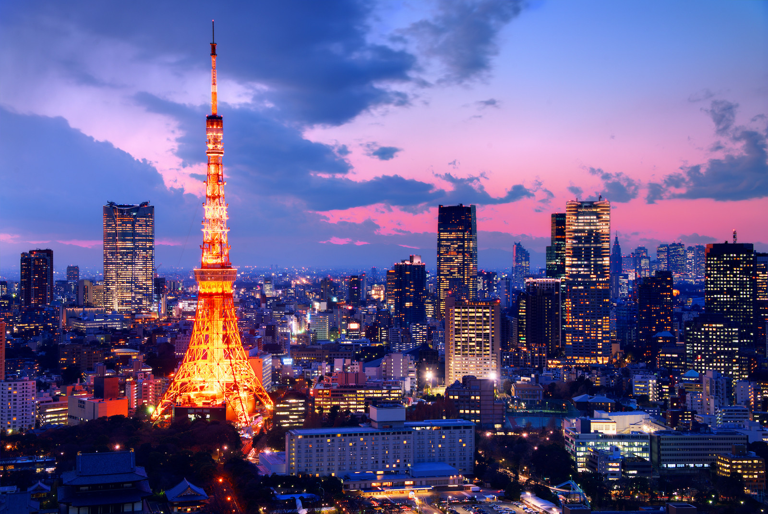

In [22]:
init_img = Image.open(init_img_path).convert("RGB")
init_img.thumbnail((768, 768))
init_img

In [23]:
%%script false --no-raise-error
!pip install --upgrade pillow


In [26]:
# https://github.com/kohya-ss/sd-scripts/blob/main/gen_img_diffusers.py
# https://github.com/kohya-ss/sd-scripts/blob/0cfcb5a49cf813547d728101cc05edf1a9b7d06c/docs/gen_img_README-ja.md?plain=1#L228

used_model='/content/drive/MyDrive/StableDifussion/models/Lora/ydenV3Trainfix_ydenT.safetensors'
#steps=100
#seed=1
prompt='best quality, masterpiece,a girl,animation,dacing on the roof'
negative_prompt='bad hands, bad quality'

outdir='/content/drive/MyDrive/output_imgs/'

#--ckpt '{pretrained_model_name_or_path}
'''
  --network_module networks.lora \
  --network_weights  '{used_model}' \
  --network_mul 0.8 \
  '''

!python /content/drive/MyDrive/StableDifussion/sd-scripts/gen_img_diffusers.py \
  --ckpt "{used_model}" \
  --n_iter 1 \
  --scale 7.5 \
  --steps 100 \
  --outdir '{outdir}' \
  --prompt '{prompt}' \
  --xformers \
  --W 1024 \
  --H 1024 \
  --seed  1 \
  --sampler k_euler_a \
  --max_embeddings_multiples 3 \
  --clip_skip 1 \
  --batch_size 1 \
  --images_per_prompt 1 \
  --image_path '{init_img_path}' --strength 0.75 \
  #--mask_path {mask_img_path} \
  #--control_net_models {control_net_model} --control_net_weights 1.0  \
  #--guide_image_path {guide_img_path} --control_net_ratios 1.0 --interactive \
  #--bf16

2023-07-20 11:46:43.405776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 11:46:43.746144: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-20 11:46:45.120983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-07-20 11:46:45.121141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cann